Karen Gong

Partner: Harrison Robel

PHYS 434 AA Lab 6

In [58]:
%matplotlib inline
# import library
#import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statistics

plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['pcolor.shading'] = 'auto'

In this lab, we want to know how the LHC data relates to our background data. To do so, we will be finding confidence intervals and determining upper and lower limits, which will help us narrow down the range for analyzing the data. The first step is to 
have some 'background' data (presumably signal free) onto which we can inject a simulated signal. So the first step is to isolate some appropriate data from your data files. 

For the LHC data, create a fake a Poisson background with mean 100. 

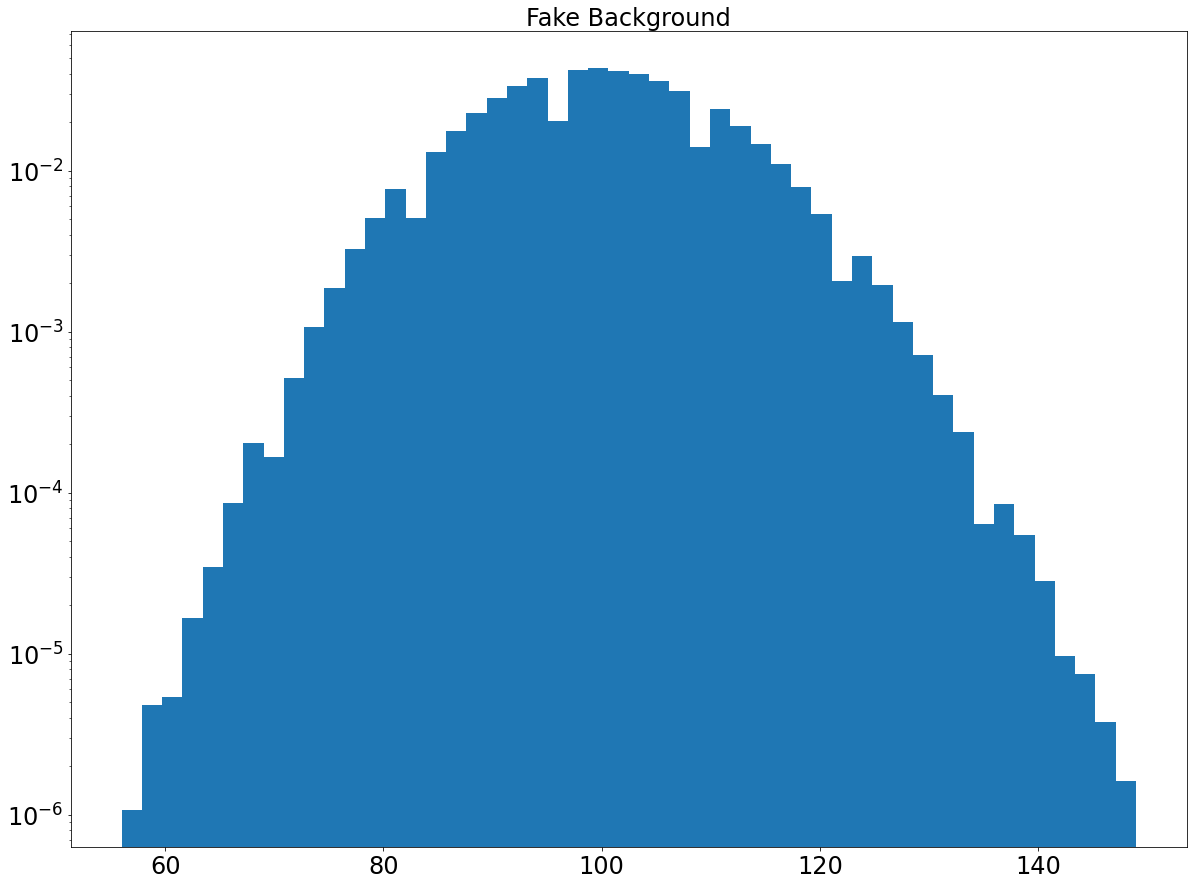

In [4]:
fake = stats.poisson.rvs(mu = 100, size = 1000000)

fig, ax = plt.subplots(1, 1)
ax.hist(fake,50, density=True)
plt.tick_params(labelsize = 24)
plt.title("Fake Background", size = 24)
plt.yscale('log')
plt.show()

Problem 1

The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is (where the data is statistically significant).

In [68]:
#prob5sig = 1/3.5e6
prob5sig = stats.norm.cdf(5)

#lower
sigma = stats.poisson.ppf(1 - prob5sig, 100)
print("The lower 5σ sensitivity threshold is", sigma)

#upper
sigma2 = stats.poisson.ppf(prob5sig, 100)
print("The upper 5σ sensitivity threshold is", sigma2)

The lower 5σ sensitivity threshold is 54.0
The upper 5σ sensitivity threshold is 154.0


The 5σ sensitivity threshold is outside of the interval 54 to 154 counts. 

Problem 2

Now we want to inject a signal of known strength. We will want to make the signal moderately strong, somewhere in the 8-30σ range. Inject this signal into your background data many times.

Use a signal of 8σ.

In [6]:
prob8sig = stats.norm.cdf(8)

sig = stats.poisson.ppf(1 - prob8sig, 100)
print(sig)

inject = fake + sig

32.0


a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

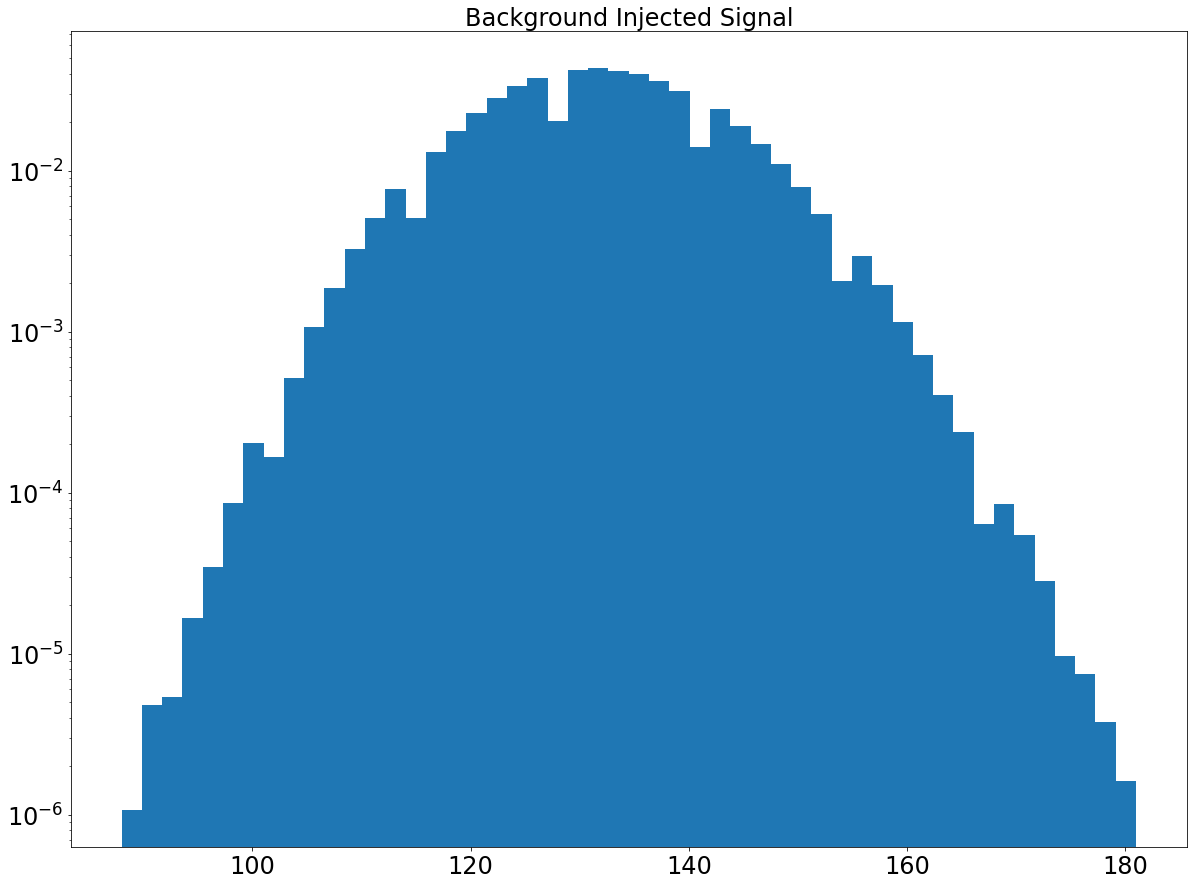

In [7]:
fig, ax = plt.subplots(1, 1)
ax.hist(inject,50, density=True)
plt.tick_params(labelsize = 24)
plt.title("Background Injected Signal", size = 24)
plt.yscale('log')
plt.show()

After injected the background with the signal, the resulting graph has the same shape, only it has shifted up by 32 points.

b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

The observed signal is slightly biased, since it is a Poisson distribution and the observed value is more likely to be stronger than the true injected signal. Since the mean is a large value, the Poisson distribution is very close to being symmetric, like a Gaussian normal distribution, even though it's not. The observed signal actually leans slightly to the left.

Problem 3

Now we will make a suite of injected signals to see what we can observe with different signals. We will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). Follow the work in Homework 5 very closely.

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

Create a unifrom distribution of fake signals. This is extremely important because we want to use a flat prior, instead of an implicit prior which would introduce a lot of error. Use the distribution from 0 to 100σ.

Text(0.5, 0, 'Observed data, $P(d|s)$')

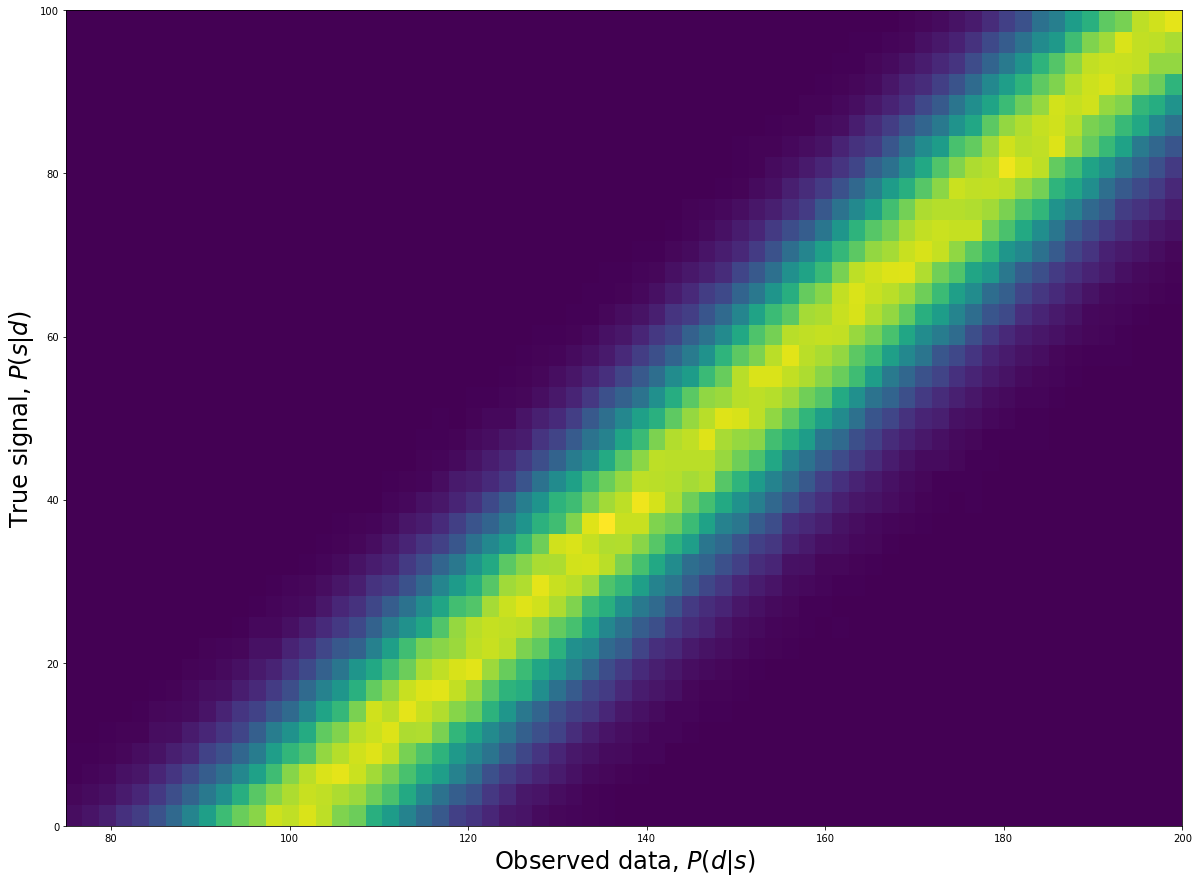

In [19]:
injsig = np.random.uniform(0, 100, 1000000)

data = fake + injsig

signaledges = np.linspace(0,100,40)
dataedges = np.linspace(75,200,68)

Psd, temp, temp2 = np.histogram2d(data,injsig, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Adding the injected signal to the fake background data, this is the resulting 2D histogram.

b) For the same injected signal power as in problem 2, show that you get the same answer.

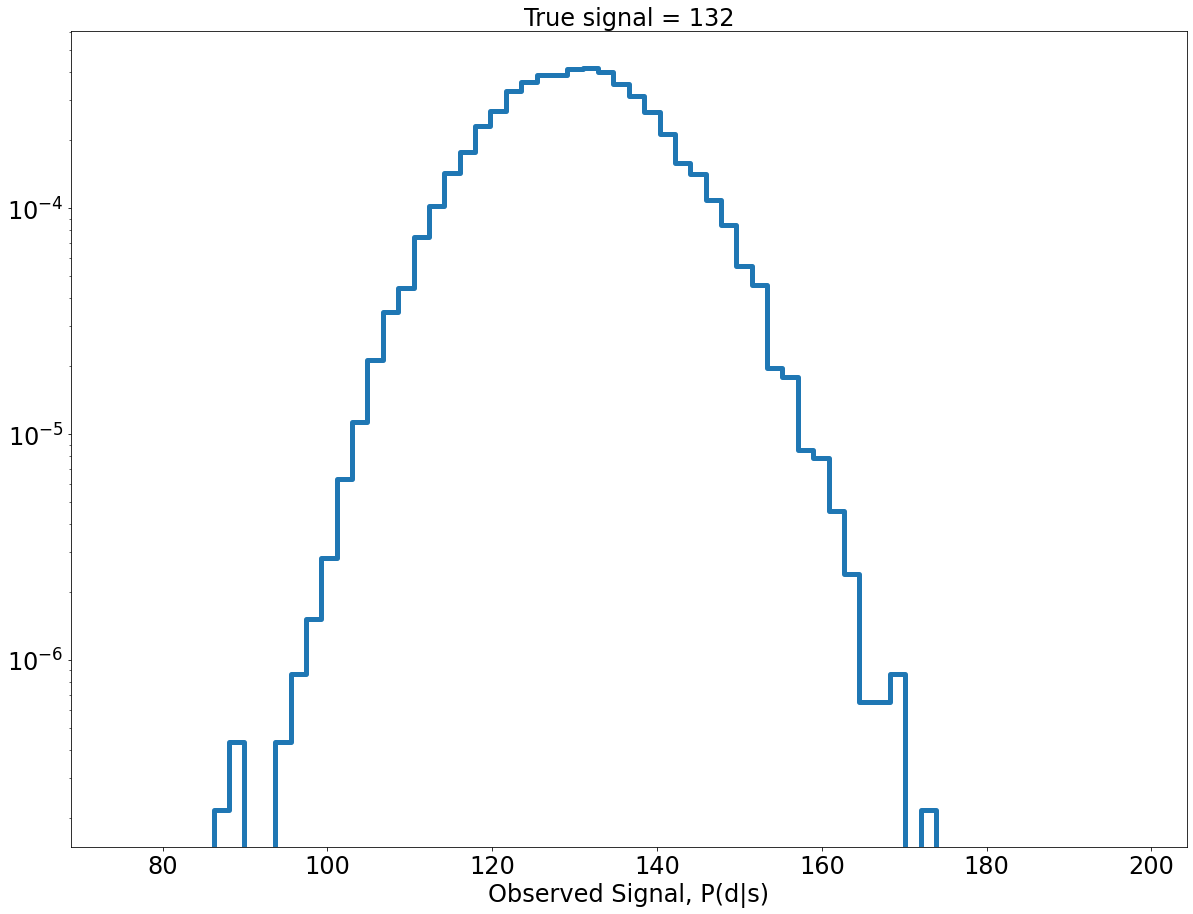

In [50]:
horizontal = Psd[:,12]

#print(temp[horizontal.argmax()])

plt.step(temp[:-1], horizontal, linewidth = 5)
plt.tick_params(labelsize = 24)
plt.yscale("log")
plt.title("True signal = 132", size = 24)
plt.xlabel("Observed Signal, P(d|s)", size = 24)
plt.show()

For the same injected signal power as in problem 2, when we take a horizontal "slice," the background looks the same. 

c) Now doing the reverse, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

Choose the observed data value of 38σ.

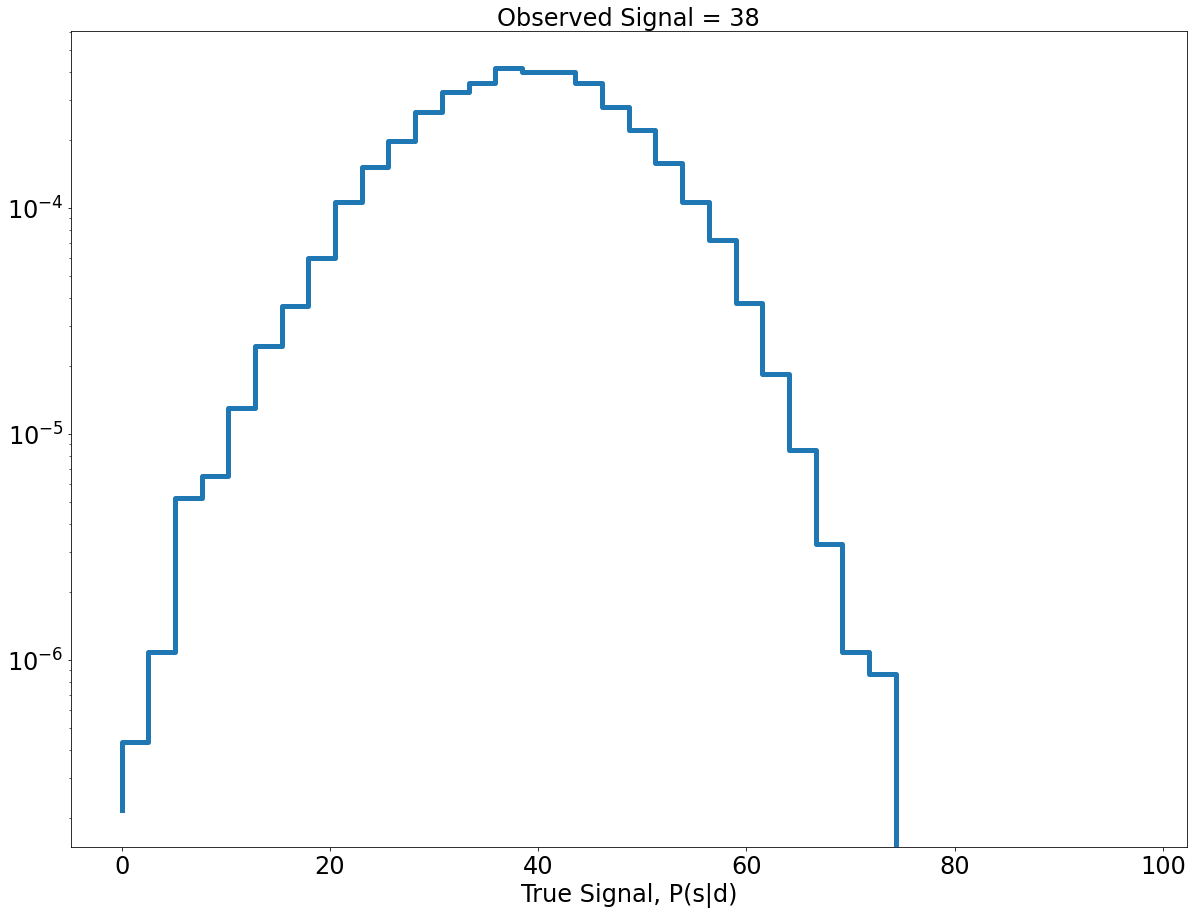

In [55]:
vertical = Psd.T[:,35]

#print(temp2[vertical.argmax()])

plt.step(temp2[:-1], vertical, linewidth = 5)
plt.tick_params(labelsize = 24)
plt.yscale("log")
plt.title("Observed Signal = 38", size = 24)
plt.xlabel("True Signal, P(s|d)", size = 24)
plt.show()

When we take a vertical "slice," the resulting graph shows what the true signal probability function looks like when the observed data value equals 38σ.

d) For your observed signal, what is the 1σ uncertainty on the true signal strength?

In [67]:
uncertainty = statistics.stdev(data) / 2
print(uncertainty)

15.273341630757596


The 1$σ$ uncertainty on the true signal strength is about 15 above or below the mean. The confidence interval is 38 $\pm$ 15.

e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

In high mean value Poisson distributions, the distribution can be considered symmetric, just as in this case. It is biased because it is still a Poisson distribution. In this lab we followed the Bayes' Theorem, which states that $P(signal|data) = \frac{P(data|signal)P(signal)}{P(data)}$, step-by-step.

Since we made sure to use a flat prior and we threw a uniform distribution, $P(data)$ is disregarded and the theorem becomes $P(signal|data) = {P(data|signal)P(signal)}$ and states that given a particular data value, we can determine the corresponding probability that the signal is produced by multiplying the probability of getting a data value, given a particular signal by the probability that a signal will have a particular strength.

This makes sense because the resulting confidence interval that we calculated following the Bayes' Theorem includes the signal we injected into the background. 